In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from nltk.tokenize import word_tokenize


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [19]:
df_reviews = pd.read_csv('../data/reviews.csv')
df_submissions = pd.read_csv('../data/Submissions.csv')
df_dec = pd.read_csv('../data/decision.csv')
df_keyword = pd.read_csv('../data/submission_keyword.csv')

In [20]:
df_reviews[['rating_int','confidence_int','review','forum']]

,rating_int,confidence_int,review,forum
0,6,4.0,There is a lot of recent work on link-predicti...,tGZu6DlbreV
1,6,4.0,Pros:\n\n- The different attention techniques ...,uKhGRvM8QNH
2,5,4.0,Overview of the paper: \nThis paper studies th...,IrM64DGB21
3,6,3.0,## Summary\nThe authors propose a near minimax...,ww-7bdU6GA9
4,6,4.0,The paper proposed a new method to prune a neu...,j0uePNuoBho
...,...,...,...,...
25311,8,3.0,This paper introduces a 'GPU-friendly' variant...,r1VGvBcxl
25312,3,5.0,This paper is relatively difficult to parse. M...,rkFd2P5gl
25313,6,4.0,This paper is technically sound. It highlights...,SyVVJ85lg
25314,5,4.0,A few issues with this paper:\n1- I find findi...,Bygq-H9eg


In [21]:
df_submissions[['abstract','id','conf_year']]

,abstract,id,conf_year
0,Stochastic optimization has become the workhor...,r28GdiQF7vM,2021
1,Graph neural networks (GNN) are powerful model...,o29tNZZqGcN,2021
2,Using a mix of shared and language-specific (L...,Wj4ODo0uyCF,2021
3,Latency of DNN (Deep Neural Network) based pre...,_qJXkf347k,2021
4,In the segmentation of fine-scale structures f...,LGgdb4TS4Z,2021
...,...,...,...
7623,"In this paper, we propose and investigate a no...",BkfiXiUlg,2017
7624,We propose a learning method to quantify human...,SkqMSCHxe,2017
7625,Synthesizing high resolution photorealistic im...,rJXTf9Bxg,2017
7626,We ask whether neural networks can learn to us...,S1HEBe_Jl,2017


In [22]:
df_rs = pd.merge(df_reviews[['rating_int','confidence_int','review','forum']], df_submissions[['abstract','id','conf_year']], left_on='forum', right_on='id', how = 'inner')

In [23]:
df_rs['review'] = df_rs['review'].str.lower()
df_rs['abstract'] = df_rs['abstract'].str.lower()

In [24]:
df_rs['review_tokens'] = df_rs['review'].apply(word_tokenize)


In [25]:
df_rs['review_num_tokens'] = df_rs['review_tokens'].apply(len)

In [26]:
df_rs_average = df_rs.groupby(['forum'])[['rating_int','review_num_tokens','confidence_int']].mean().reset_index()

/var/folders/v9/8whxr3fd1mv_pwkjh0kn920m0000gn/T/ipykernel_32787/2078969568.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df_rs_average['confidence_int'], df_rs_average['rating_int'], alpha=0.6, cmap='viridis', edgecolor='w', linewidth=0.5)


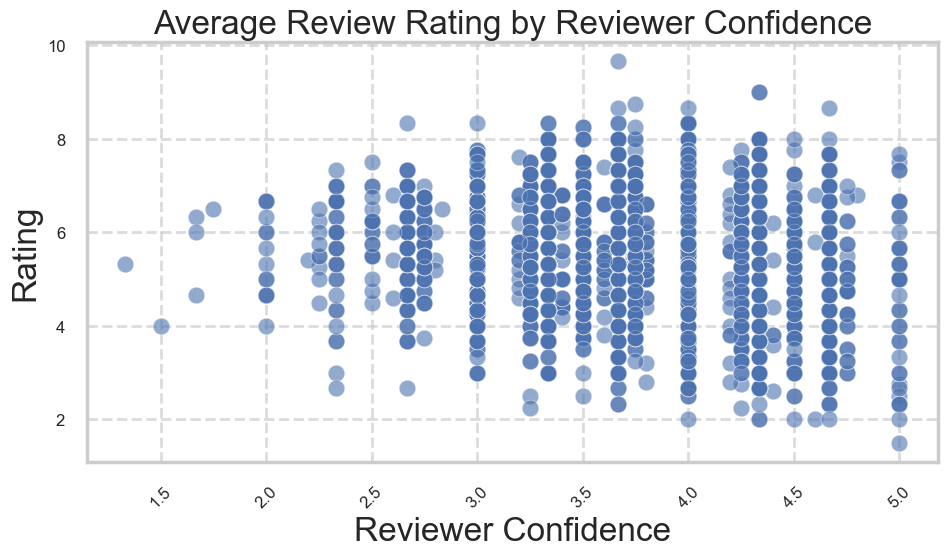

In [27]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_rs_average['confidence_int'], df_rs_average['rating_int'], alpha=0.6, cmap='viridis', edgecolor='w', linewidth=0.5)


# Add titles and labels
plt.title('Average Review Rating by Reviewer Confidence')
plt.xlabel('Reviewer Confidence')
plt.ylabel('Rating')

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)


# Show plot
plt.tight_layout()
plt.show()

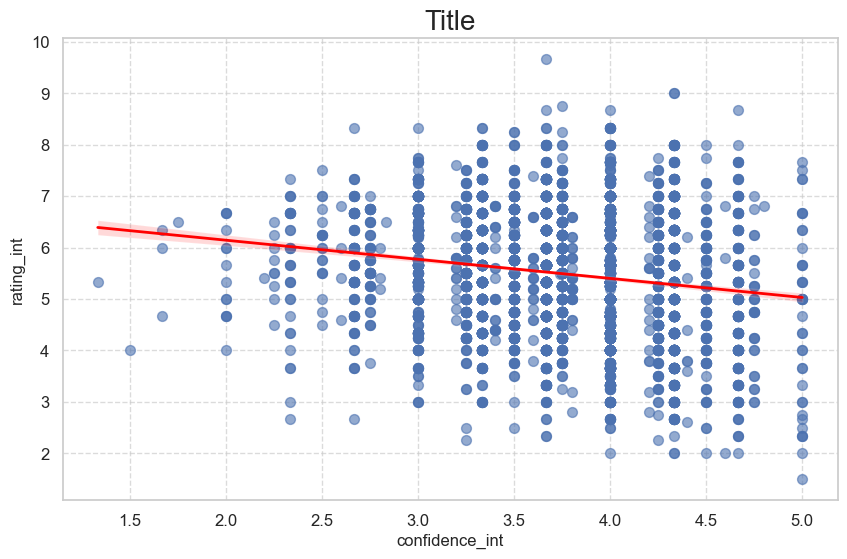

In [28]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(y="rating_int", x="confidence_int", data=df_rs_average, fit_reg=True, 
            scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'b'}, 
            line_kws={'color': 'red', 'linewidth': 2})

# Customize the plot with titles and labels
plt.title('Title', fontsize=20)
#plt.xlabel('confidence_int', fontsize=15)
#plt.ylabel('rating_int', fontsize=15)

# Customize the ticks on the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


m = ols('rating_int ~ confidence_int',df_rs_average).fit()
m.summary()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rating_int   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     153.8
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           7.76e-35
Time:                        21:11:32   Log-Likelihood:                -8181.6
No. Observations:                5379   AIC:                         1.637e+04
Df Residuals:                    5377   BIC:                         1.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8855      0.113     60.819      0.000       6.664       7.107
confidence_int    -0.3713      0.030    -12.400      0.000      -0.430      -0.313
==============================================================================
Omnibus:                       16.185   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.384
Skew:                          -0.048   Prob(JB):                      0.00124
Kurtosis:                       2.775   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
df_rs_average.columns

Index(['forum', 'rating_int', 'review_num_tokens', 'confidence_int'], dtype='object')

In [31]:
m = ols('rating_int ~ review_num_tokens + confidence_int',df_rs_average).fit()
m.summary()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorica

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rating_int   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     76.90
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.18e-33
Time:                        21:11:33   Log-Likelihood:                -8181.6
No. Observations:                5379   AIC:                         1.637e+04
Df Residuals:                    5376   BIC:                         1.639e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.8924      0.117     58.929      0.000       6.663       7.122
review_num_tokens -1.842e-05   7.73e-05     -0.238      0.812      -0.000       0.000
confidence_int       -0.3708      0.030    -12.340      0.000      -0.430      -0.312
==============================================================================
Omnibus:                       16.217   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.437
Skew:                          -0.049   Prob(JB):                      0.00121
Kurtosis:                       2.775   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_dec

,id,tcdate,tmdate,number,forum,replyto,title,decision,comment,conf_name,confidence
0,0zV62G_Z4s,1610040357457,1611063503220,1,meG3o0ttiAD,meG3o0ttiAD,Final Decision,Reject,This paper introduces two new quantum neural n...,ICLR2021,NaN
1,SZvFCZvTsoS,1610040498377,1610992686336,1,AJY3fGPF1DC,AJY3fGPF1DC,Final Decision,Reject,This paper considers the problem of identifica...,ICLR2021,NaN
2,-9zBJ8kapV,1610040388799,1610734729796,1,_O9YLet0wvN,_O9YLet0wvN,Final Decision,Reject,The reviewers have ranked this paper as border...,ICLR2021,NaN
3,dswNkjMSvK,1610040389095,1610717627789,1,WoLQsYU8aZ,WoLQsYU8aZ,Final Decision,Reject,This paper represents the PettingZoo library o...,ICLR2021,NaN
4,hHfc3BD1vIb,1610040488610,1610618696830,1,Sc8cY4Jpi3s,Sc8cY4Jpi3s,Final Decision,Reject,"Dear authors,\n\nI like to topic of your paper...",ICLR2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10300,iCMbtNSRp3s,1642696832494,1642696832494,1,j-63FSNcO5a,j-63FSNcO5a,Paper Decision,Accept (Poster),"The paper proposes a framework, named Disentag...",ICLR2022,NaN
10301,ZjiBIEPyMOn,1642696832492,1642696832492,1,AjGC97Aofee,AjGC97Aofee,Paper Decision,Accept (Poster),This paper receives positive reviews. The auth...,ICLR2022,NaN
10302,-bEai7YVHEi,1642696832460,1642696832460,1,BnQhMqDfcKG,BnQhMqDfcKG,Paper Decision,Accept (Spotlight),This paper introduced a probabilistic extensio...,ICLR2022,NaN
10303,RKQzOhYsYd5,1642696832458,1642696832458,1,JLbXkHkLCG6,JLbXkHkLCG6,Paper Decision,Reject,Learning policies from video demonstrations al...,ICLR2022,NaN


In [33]:
df_combined_model = pd.merge(df_rs, df_dec, left_on='forum', right_on='forum', how = 'inner')

df_combined_model.to_csv('df_combined_model.csv')

In [32]:
df_combined_model

,rating_int,confidence_int,review,forum,abstract,id_x,conf_year,review_tokens,review_num_tokens,id_y,tcdate,tmdate,number,replyto,title,decision,comment,conf_name,confidence
0,6,4.0,there is a lot of recent work on link-predicti...,tGZu6DlbreV,this paper studies learning logic rules for re...,tGZu6DlbreV,2021,"[there, is, a, lot, of, recent, work, on, link...",1537,uVb3Ow-12JH,1610045694102,1610474017438,1,tGZu6DlbreV,Final Decision,Accept (Poster),There is a consensus among the reviewers that ...,ICLR2021,NaN
1,7,4.0,"in this paper, the author proposes rnnlogic fo...",tGZu6DlbreV,this paper studies learning logic rules for re...,tGZu6DlbreV,2021,"[in, this, paper, ,, the, author, proposes, rn...",722,uVb3Ow-12JH,1610045694102,1610474017438,1,tGZu6DlbreV,Final Decision,Accept (Poster),There is a consensus among the reviewers that ...,ICLR2021,NaN
2,6,2.0,this paper focuses on learning logic rules via...,tGZu6DlbreV,this paper studies learning logic rules for re...,tGZu6DlbreV,2021,"[this, paper, focuses, on, learning, logic, ru...",236,uVb3Ow-12JH,1610045694102,1610474017438,1,tGZu6DlbreV,Final Decision,Accept (Poster),There is a consensus among the reviewers that ...,ICLR2021,NaN
3,8,1.0,"in this work, the authors illustrate an approa...",tGZu6DlbreV,this paper studies learning logic rules for re...,tGZu6DlbreV,2021,"[in, this, work, ,, the, authors, illustrate, ...",121,uVb3Ow-12JH,1610045694102,1610474017438,1,tGZu6DlbreV,Final Decision,Accept (Poster),There is a consensus among the reviewers that ...,ICLR2021,NaN
4,6,4.0,pros:\n\n- the different attention techniques ...,uKhGRvM8QNH,"knowledge distillation, in which a student mod...",uKhGRvM8QNH,2021,"[pros, :, -, the, different, attention, techni...",338,a8RiFt2IlY,1610040503192,1610474110215,1,uKhGRvM8QNH,Final Decision,Accept (Poster),"After the rebuttal stage, all reviewers lean p...",ICLR2021,NaN


1) Do the tokenization for both abstract and review including removing the stop words

2) Run an analysis on what relationship we would like to analyze with linear regression given the features we have built

3) Run the regression and interpret the results

# Potential Relationships:

1) Reviewer score and Review Confidence
2) Review Length and Review Score
3) Review Length and Review Confidence

3) Review score + Conference Year ~ Accept/Reject
4) Conference Year ~ Review Confidence

# Classification Relationships:

6) Accept/Reject ~ Review Score + Conference Year + Reviewer Confidence + Submission Length + Topic

In [33]:
df_keyword

,submission_id,primary_keyword,secondary_keyword
0,--gvHfE3Xf5,reinforcement learning,meta-learning
1,--rcOeCKRh,transfer learning,object detection
2,-0LuSWi6j4,variational autoencoder,deep generative models
3,-29uFS4FiDZ,word embeddings,other
4,-2FCwDKRREu,representation learning,other
...,...,...,...
7635,ztMLindFLWR,graph neural networks,graph representation learning
7636,zuDmDfeoB_1,meta-learning,other
7637,zv-typ1gPxA,graph neural networks,other
7638,zxEfpcmTDnF,representation learning,deep generative models


In [34]:
df_combined_model.corr(numeric_only=True)

,rating_int,confidence_int,conf_year,review_num_tokens,tcdate,tmdate,number
rating_int,1.000000,-0.592927,NaN,-0.392889,0.375000,-0.375000,NaN
confidence_int,-0.592927,1.000000,NaN,0.651335,-0.395285,0.395285,NaN
conf_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_num_tokens,-0.392889,0.651335,NaN,1.000000,0.245726,-0.245726,NaN
tcdate,0.375000,-0.395285,NaN,0.245726,1.000000,-1.000000,NaN
tmdate,-0.375000,0.395285,NaN,-0.245726,-1.000000,1.000000,NaN
number,NaN,NaN,NaN,NaN,NaN,NaN,NaN
